# **Parkinson Disease Detection**

## **Import Depedencies/Libraries**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc

## **Data Collection and Preprocessing**

***Loading Data***

In [76]:
import os

# Change directory only if not in the project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir("../")

In [77]:
parkinson_data = pd.read_csv('./data/Parkinsson_disease.csv')

***printing the first 5 rows***

In [78]:
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


***Shape of the Data***

In [79]:
parkinson_data.shape

(195, 24)

***Basic Info of the Data***

In [80]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

***Statistical Summary***

In [81]:
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


***Missing values***

In [82]:
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [83]:
# 1 --> Parkinsson's Positive, 0 --> Healthy
parkinson_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

***Drop name column***

In [84]:
parkinson_data.drop(['name'], axis=1, inplace=True)

***Histgram***

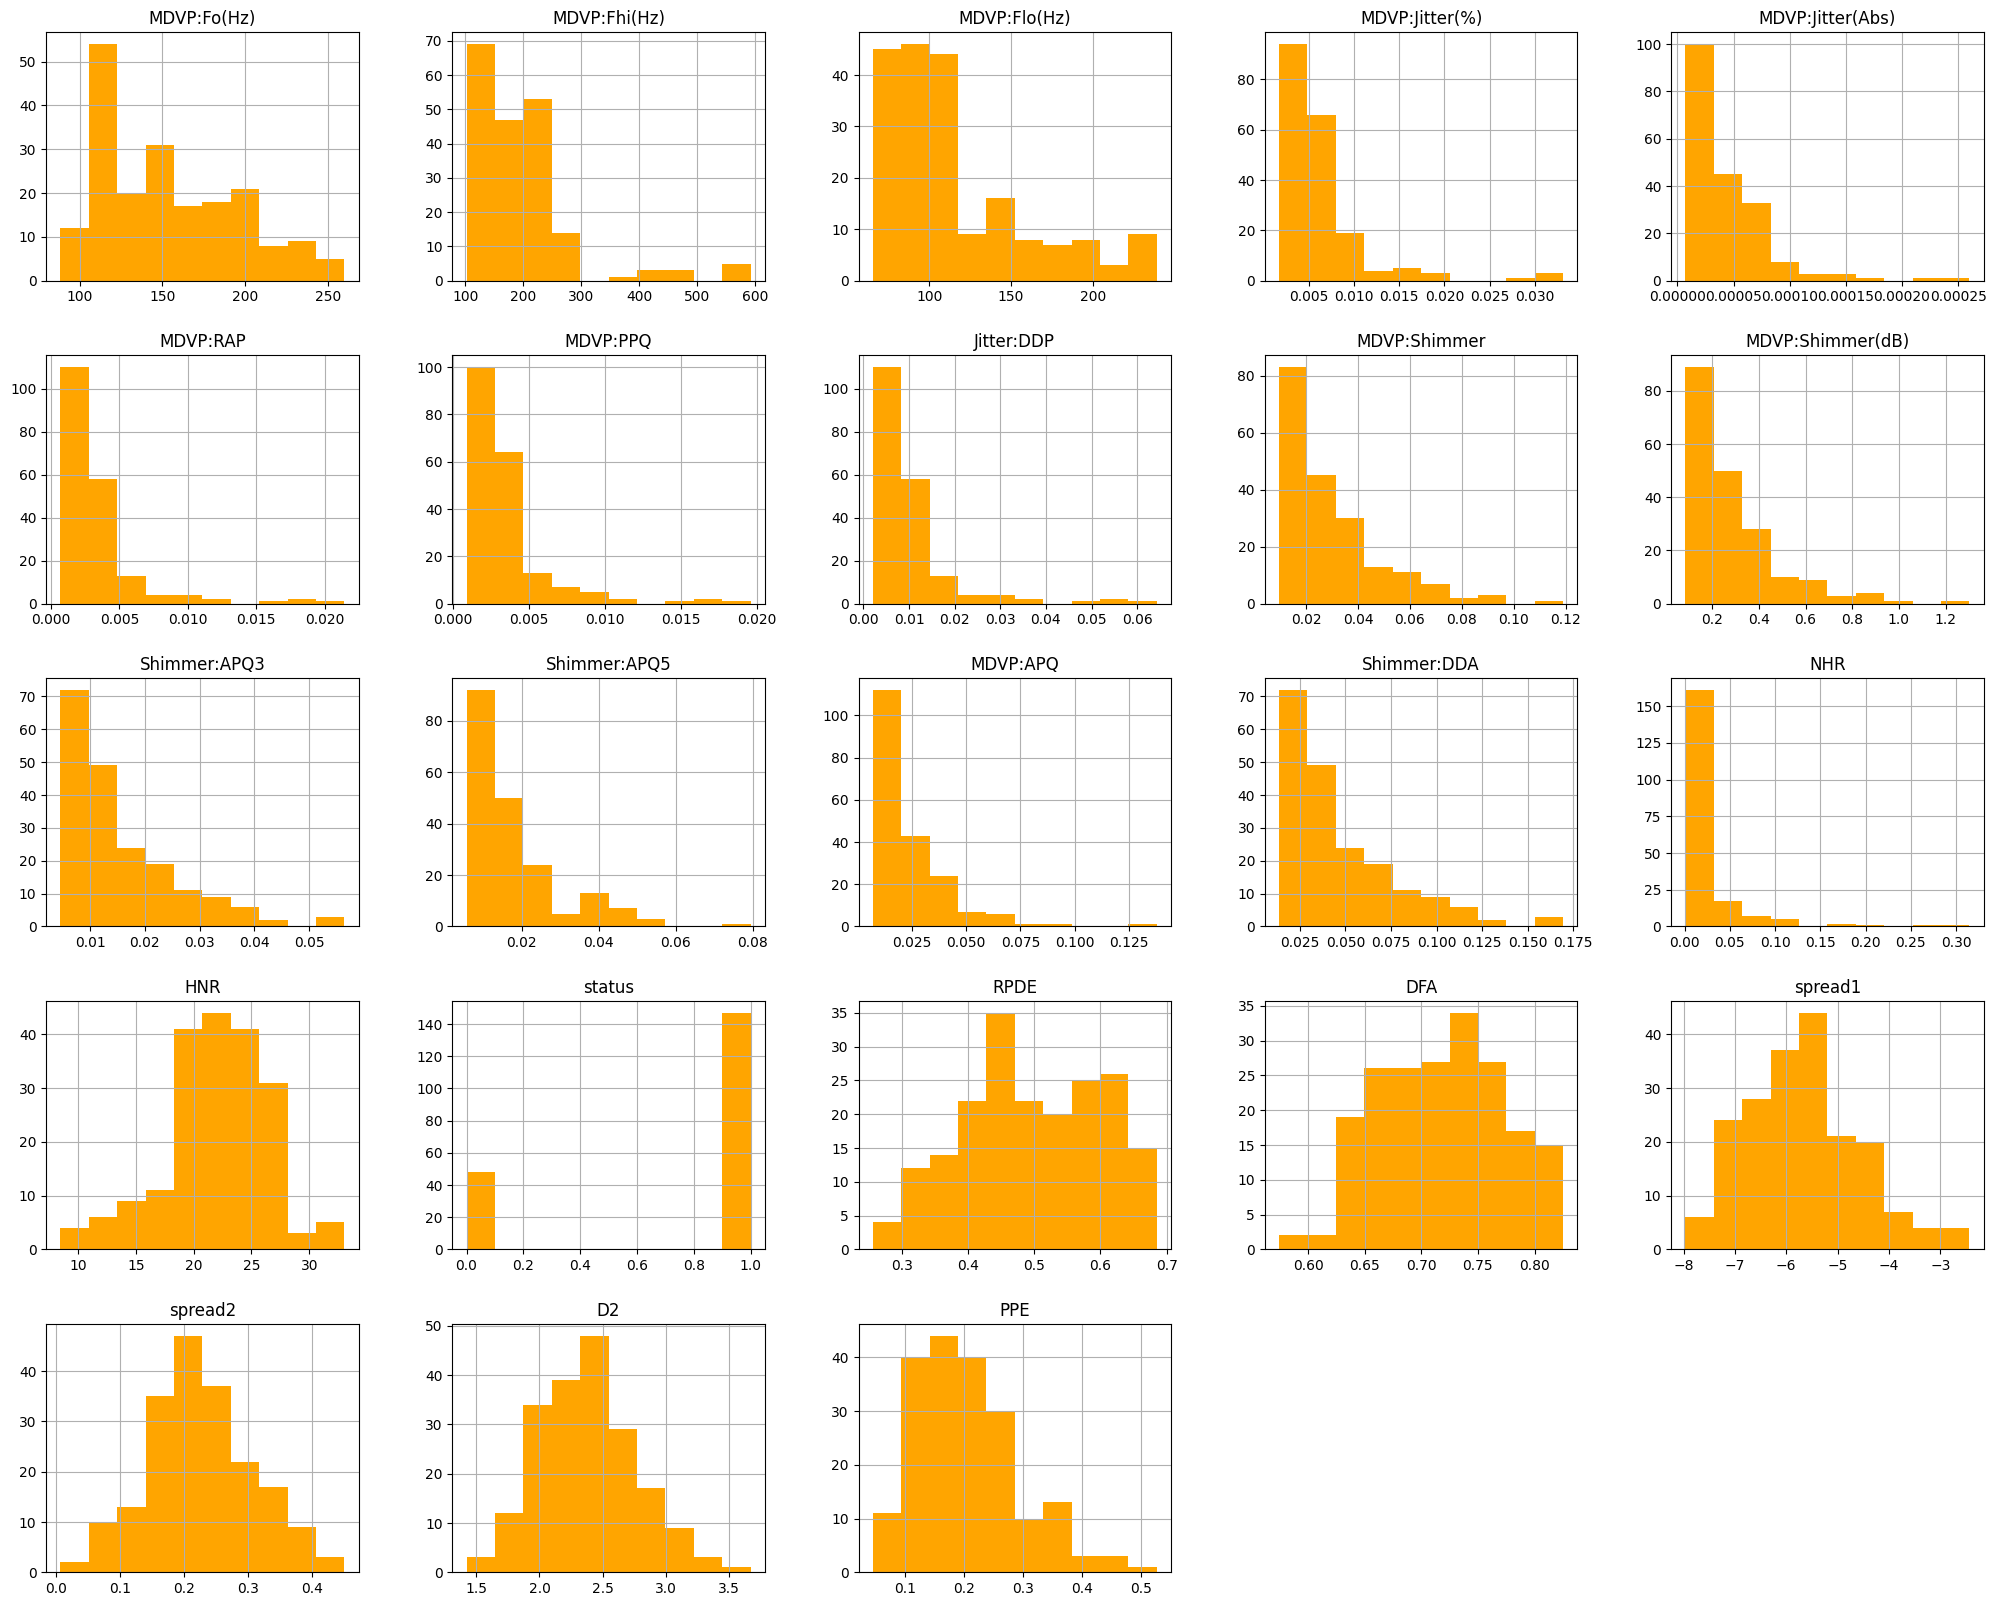

In [85]:
parkinson_data.hist(figsize=(25,20), color='orange')
plt.show()

***Check multicorrelation***

In [86]:
parkinson_data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

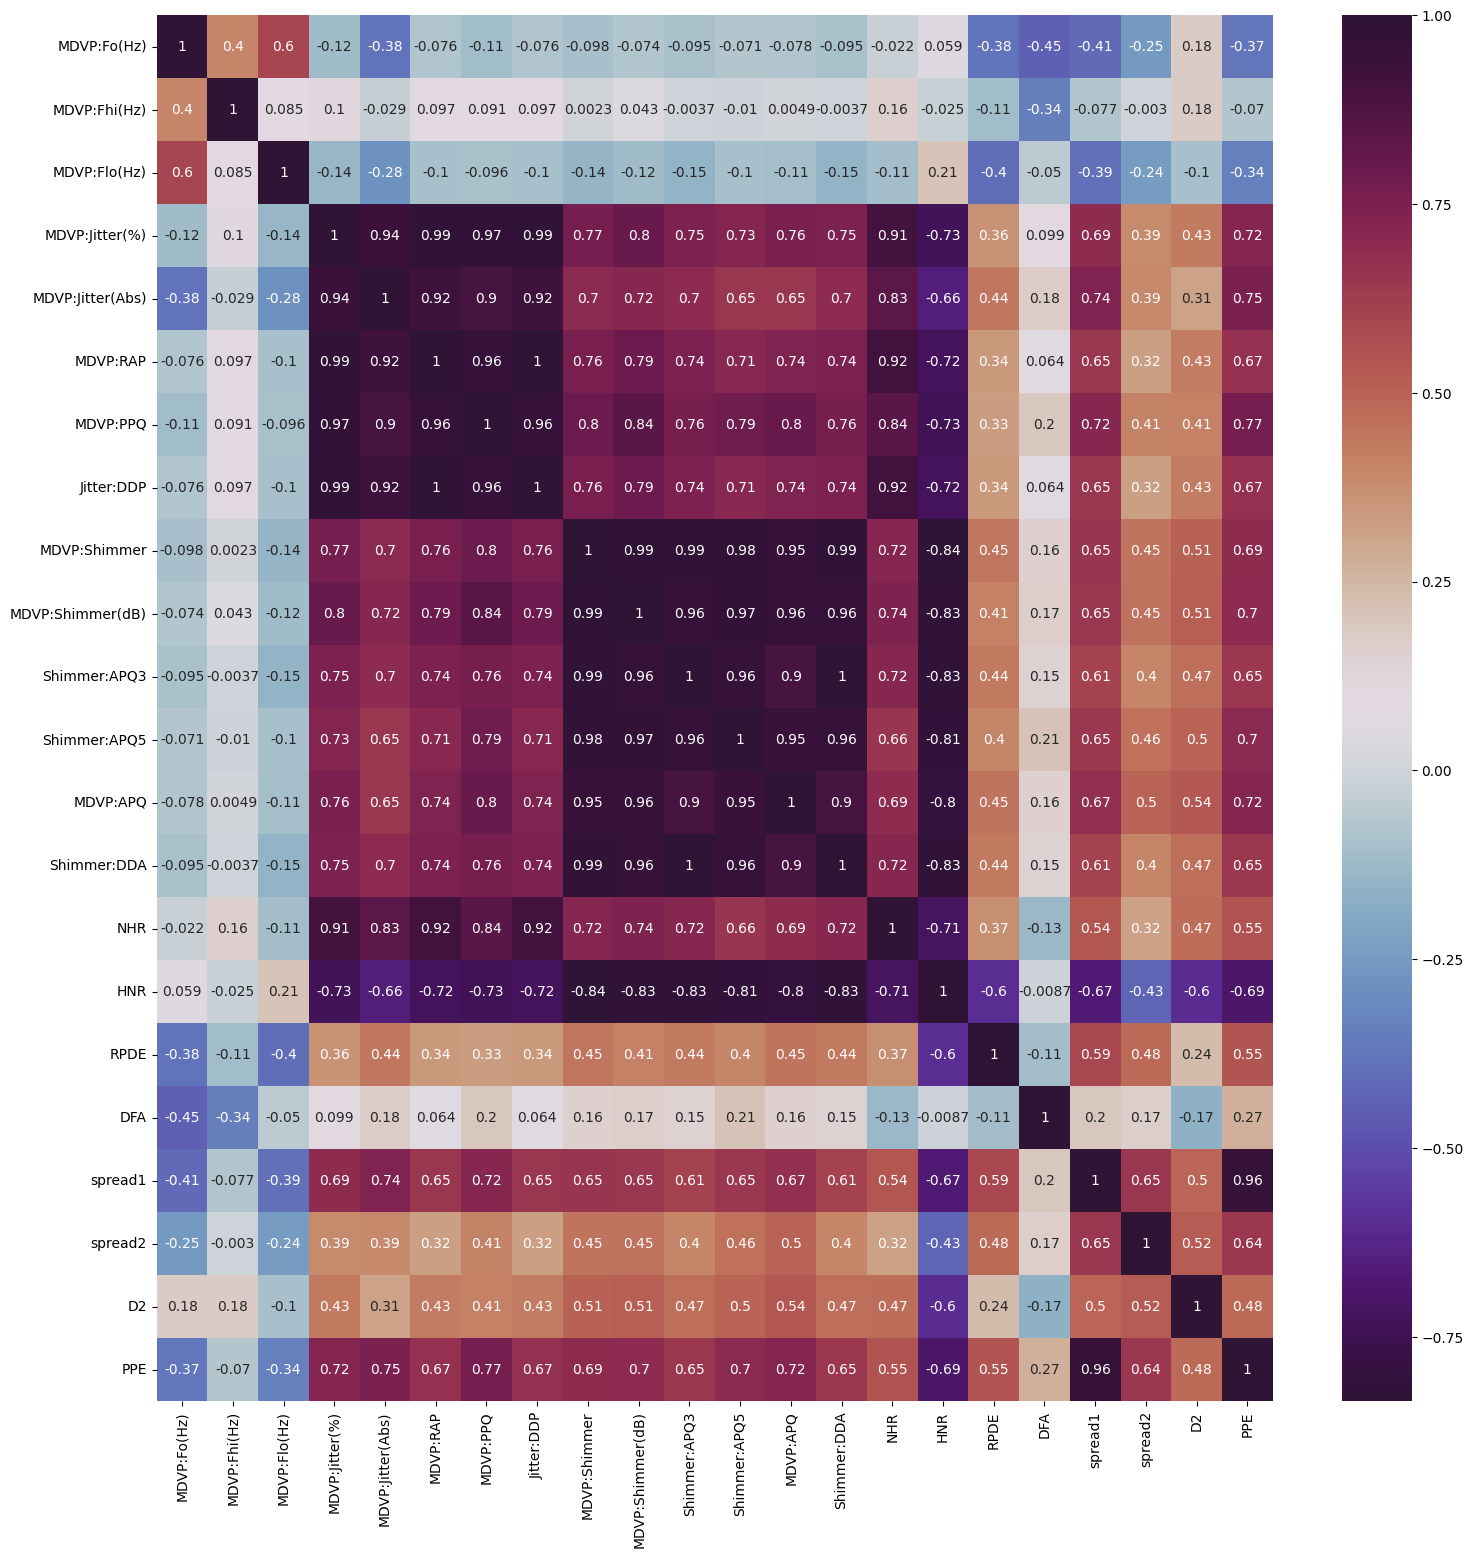

In [87]:
correlation = parkinson_data.drop(columns='status').corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True, cmap='twilight_shifted')
plt.show()

## **Build Model**

***Spliting Data***

In [88]:
x = parkinson_data.drop(columns='status')
y = parkinson_data['status']

In [89]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [90]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

***Scaling the features to between -1 and 1***

In [91]:
scaler = MinMaxScaler((-1,1))
x_scaled = scaler.fit_transform(x)

In [92]:
x_scaled

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

### ***Saving the Scaler***

In [93]:
with open('./models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### ***Train Test Split***

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [95]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (156, 22)
x_test shape: (39, 22)
y_train shape: (156,)
y_test shape: (39,)


### ***Baseline model***

In [96]:
score_baseline = y.value_counts(normalize=True).max()
score_baseline

np.float64(0.7538461538461538)

### ***Logistic Regression Model***

In [97]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [98]:
pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression Recall: {recall_lr}')

Logistic Regression Accuracy: 0.8974358974358975
Logistic Regression Recall: 1.0


### ***Random Forest Model***

In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Recall: {recall_rf}')

Random Forest Accuracy: 0.9487179487179487
Random Forest Recall: 1.0


### ***Support Vector Machine (SVM) Model***

In [101]:
svm = SVC(kernel='linear', probability=True)
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [102]:
pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
recall_svm = recall_score(y_test, pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print(f'SVM Recall: {recall_svm}')

SVM Accuracy: 0.8974358974358975
SVM Recall: 1.0


### ***Choosing the Best Model***

In [103]:
models = {'Logistic Regression': accuracy_lr, 'Random Forest': accuracy_rf, 'SVM': accuracy_svm}
best_model_name = max(models, key=models.get)

if best_model_name == 'Logistic Regression':
    best_model = lr
elif best_model_name == 'Random Forest':
    best_model = rf
else:
    best_model = svm

print(f'Best Model: {best_model_name} with Accuracy {models[best_model_name]}')

Best Model: Random Forest with Accuracy 0.9487179487179487


### ***Saving the Best Model***

In [104]:
with open('./models/parkinson_detection_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### ***Confusion Matrix of Best Model***

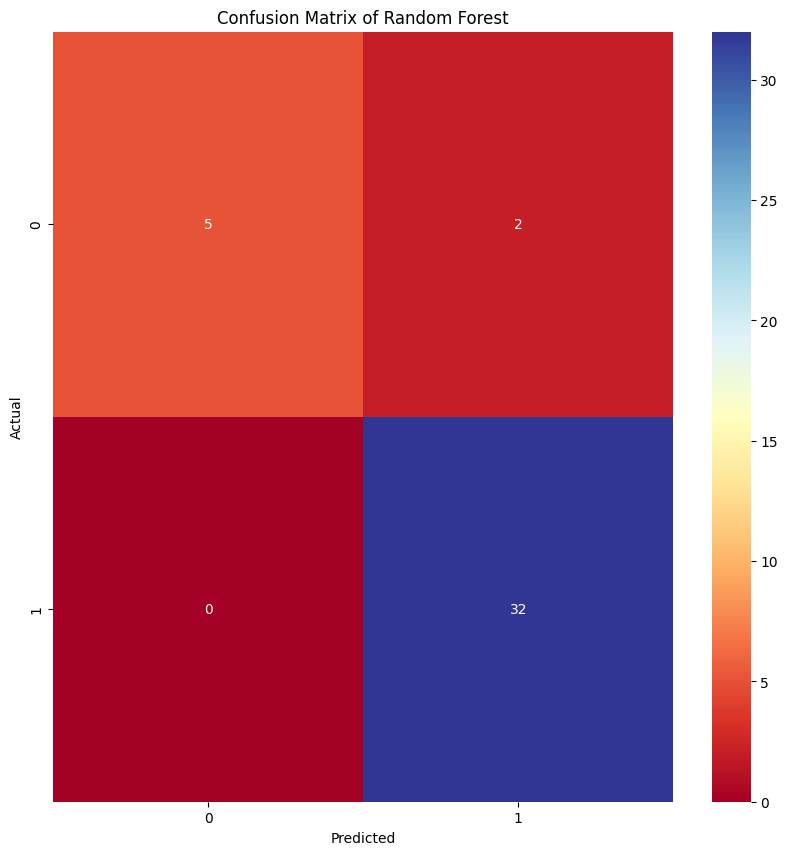

In [105]:
pred_best = best_model.predict(x_test)
cm_best = confusion_matrix(y_test, pred_best)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_best, annot=True, cmap='RdYlBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix of {best_model_name}')
plt.show()

## **Comunicate the results**

### ***Prediction vs actual***

In [106]:
pd.DataFrame(data={'Actual': y_test, 'Predicted': pred_best})

,Actual,Predicted
138,1,1
16,1,1
155,1,1
96,1,1
68,1,1
153,1,1
55,1,1
15,1,1
112,1,1
111,1,1


### ***Feature Importances***

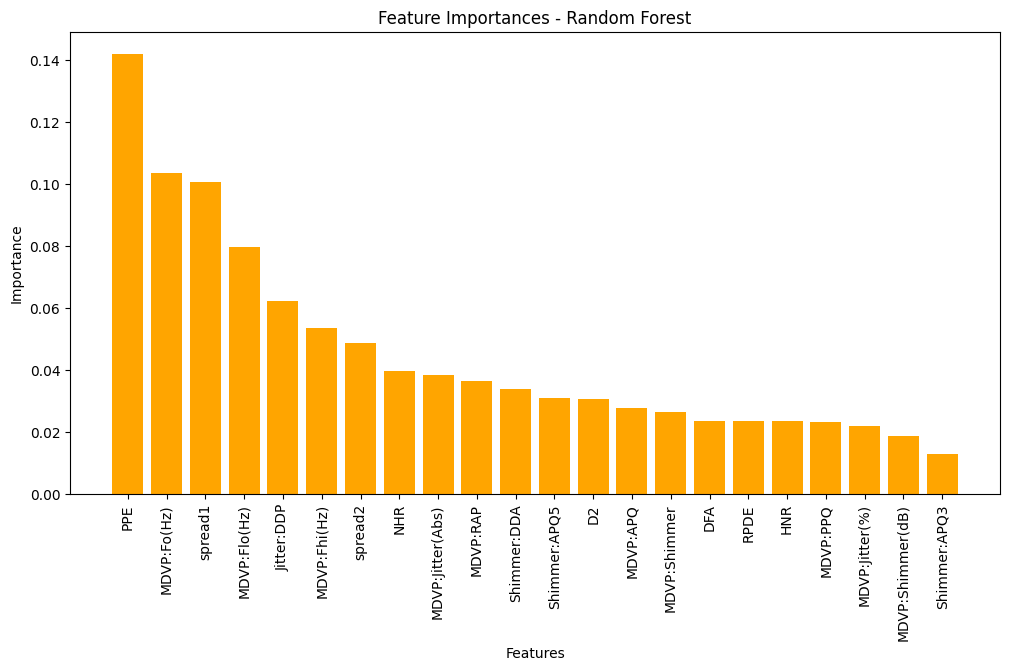

In [107]:
if best_model_name == 'Random Forest':
    feature_importances = best_model.feature_importances_
    features = x.columns
    sorted_idx = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='orange')
    plt.xticks(range(len(sorted_idx)), features[sorted_idx], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances - Random Forest')
    plt.show()
    
elif best_model_name == 'Logistic Regression':
    coef = np.abs(best_model.coef_[0])
    sorted_idx = np.argsort(coef)[::-1]
    sorted_features = x.columns[sorted_idx]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_idx)), coef[sorted_idx], align='center', color='orange')
    plt.xticks(range(len(sorted_idx)), sorted_features, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Magnitude')
    plt.title('Feature Coefficients - Logistic Regression')
    plt.show()

### ***ROC Curve***

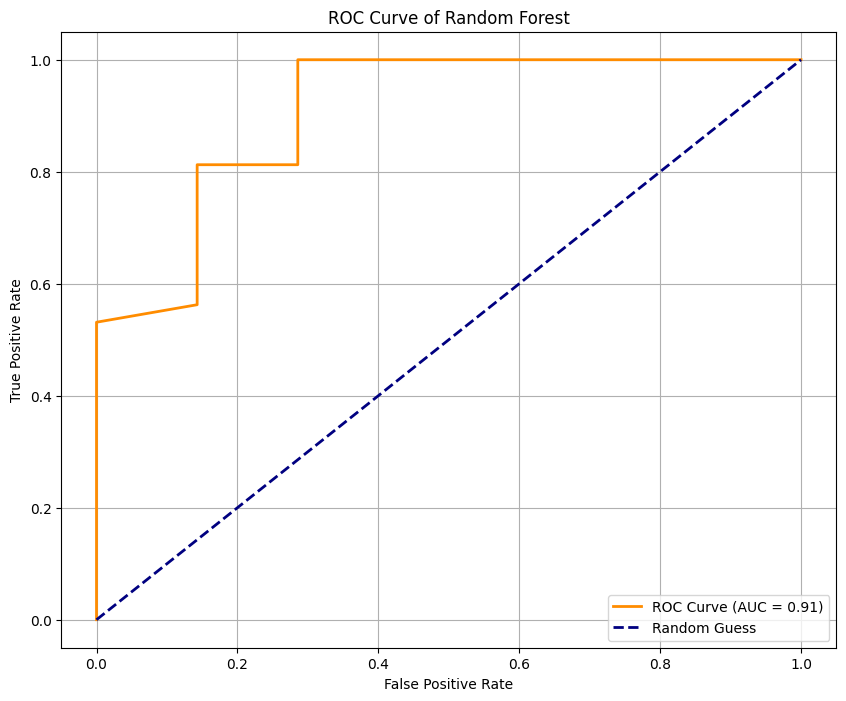

In [108]:
probs_best = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve of {best_model_name}')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **Build a Predictive System**

In [109]:
def predict_parkinson(input_data):
    input_data_array = np.asarray(input_data)
    input_data_reshape = input_data_array.reshape(1, -1)
    std_data = scaler.transform(input_data_reshape)
    prediction = best_model.predict(std_data)
    
    if prediction == 0:
        return "The Person does not have Parkinson's Disease"
    else:
        return "The Person has Parkinson's Disease"

In [110]:
input_data = (223.365, 238.987, 98.664, 0.00264, 0.00001, 0.00154, 0.00151, 0.00461, 0.01906, 0.165, 0.01013, 0.01296, 0.0134, 0.03039, 0.00301, 26.138, 0.447979, 0.686264, -7.293801, 0.086372, 2.32156, 0.098555)
print(predict_parkinson(input_data))

The Person does not have Parkinson's Disease


c:\Users\User\anaconda3\envs\edge_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [111]:
input_data = (162.568, 198.346, 77.63, 0.00502, 0.00003, 0.0028, 0.00253, 0.00841, 0.01791, 0.168, 0.00793, 0.01057, 0.01799, 0.0238, 0.0117, 25.678, 0.427785, 0.723797, -6.635729, 0.209866, 1.957961, 0.135242)
print(predict_parkinson(input_data))

The Person has Parkinson's Disease


c:\Users\User\anaconda3\envs\edge_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
